# Analyzing the Market Penetration and Growth Trends of Electric Vehicles (EVs)

## Introduction
Electric vehicles (EVs) are becoming increasingly popular as the world shifts towards sustainable transportation. This analysis aims to understand the current market penetration of EVs, forecast future market growth, and identify key trends and factors driving market expansion. The specific objectives include:

1. Assessing historical growth trends in EV registrations.
2. Forecasting future EV registrations based on historical trends.
3. Analyzing the distribution of EV registrations across different models, brands, and geographic regions.
4. Estimating market size and potential growth for the coming years.
5. Providing insights to support stakeholders in decision-making related to production, infrastructure planning, and policy formulation.


## Data Overview
The dataset contains historical data on electric vehicle registrations, including details such as the vehicle's make, model, year, type, geographic location, and more. Below is a brief overview of the dataset:
- **VIN (1-10):** The first 10 characters of the Vehicle Identification Number.
- **County:** The county where the vehicle is registered.
- **City:** The city where the vehicle is registered.
- **State:** The state where the vehicle is registered.
- **Postal Code:** The postal code of the registration area.
- **Model Year:** The year of the vehicle model.
- **Make:** The manufacturer of the vehicle.
- **Model:** The model name of the vehicle.
- **Electric Vehicle Type:** The type of electric vehicle (e.g., Battery Electric Vehicle, Plug-in Hybrid Electric Vehicle).
- **Electric Range:** The range of the vehicle on a full charge.
- **Base MSRP:** The manufacturer's suggested retail price.
- **Legislative District:** The legislative district of the registration area.
- **Vehicle Location:** The geographic coordinates of the vehicle's registration.
- **Electric Utility:** The electric utility provider for the registration area.
- **2020 Census Tract:** The census tract for the registration area.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [16]:
# Load the dataset
file_path = 'Electric_Vehicle_Population_Data.csv'
ev_data = pd.read_csv(file_path)

In [17]:
# Display the first few rows of the dataset to understand its structure
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [18]:
# Mengubah 'Model Year' menjadi integer (tahun)
ev_data['Model Year'] = ev_data['Model Year'].astype(int)
# Mengelompokkan data berdasarkan tahun dan menghitung jumlah registrasi
yearly_registrations = ev_data.groupby('Model Year').size()

In [19]:
# Membuat model dan melakukan peramalan
model = ExponentialSmoothing(yearly_registrations, trend='add', seasonal=None, seasonal_periods=None)
fit = model.fit()
forecast = fit.forecast(5)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


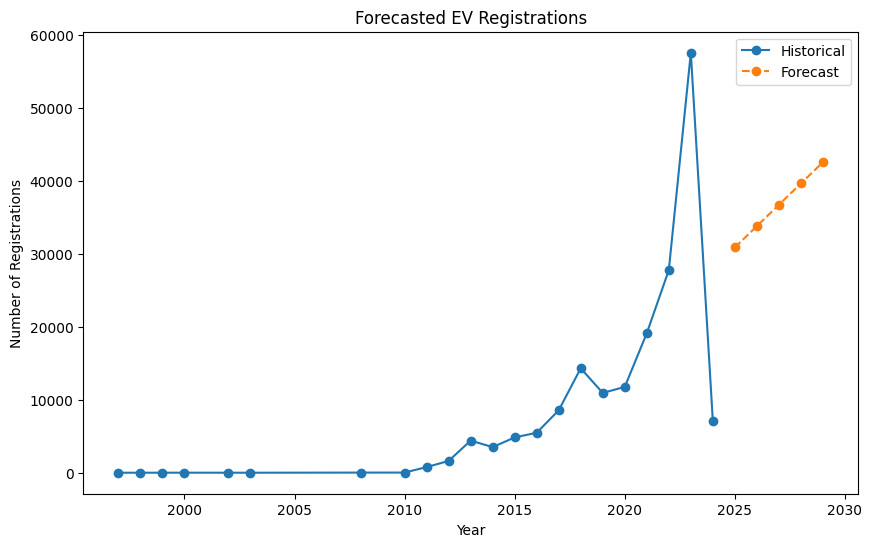

In [20]:
# Membuat plot data historis dan peramalan
plt.figure(figsize=(10, 6))
plt.plot(yearly_registrations.index, yearly_registrations.values, label='Historical', marker='o')
plt.plot(range(yearly_registrations.index[-1] + 1, yearly_registrations.index[-1] + 6), forecast, label='Forecast', linestyle='--', marker='o')
plt.title('Forecasted EV Registrations')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.legend()
plt.show()

In [21]:
# Distribution by Make
make_distribution = ev_data['Make'].value_counts()
# Distribution by Model
model_distribution = ev_data['Model'].value_counts()
# Distribution by County
county_distribution = ev_data['County'].value_counts()

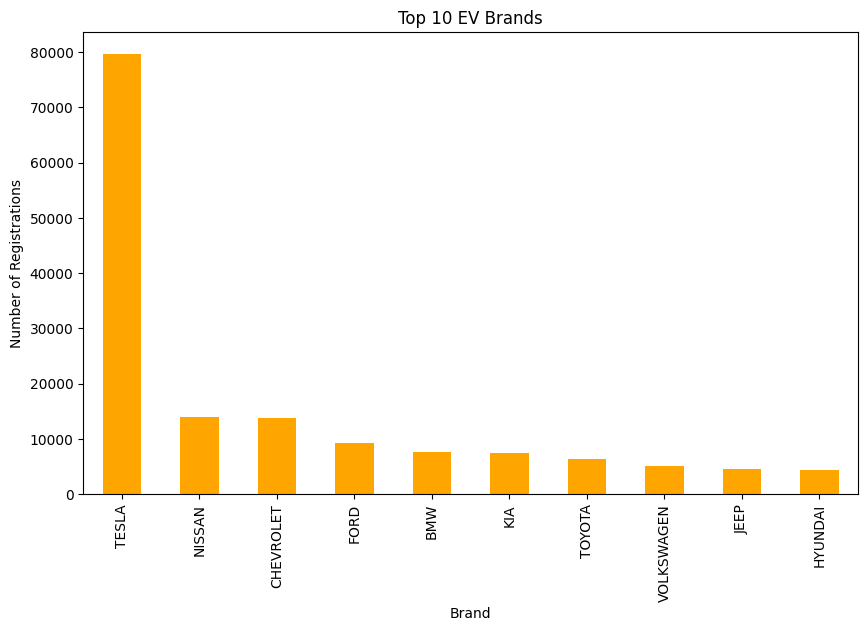

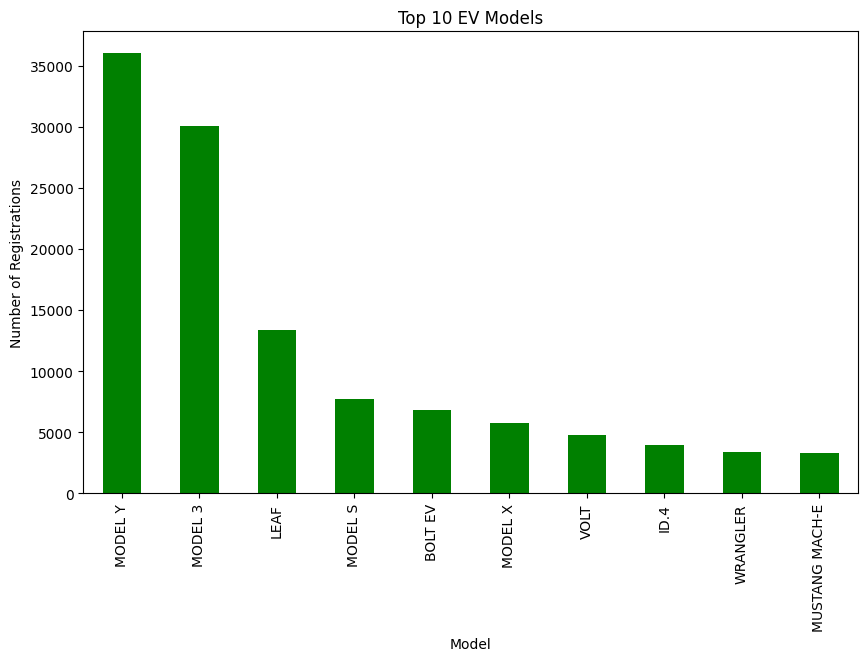

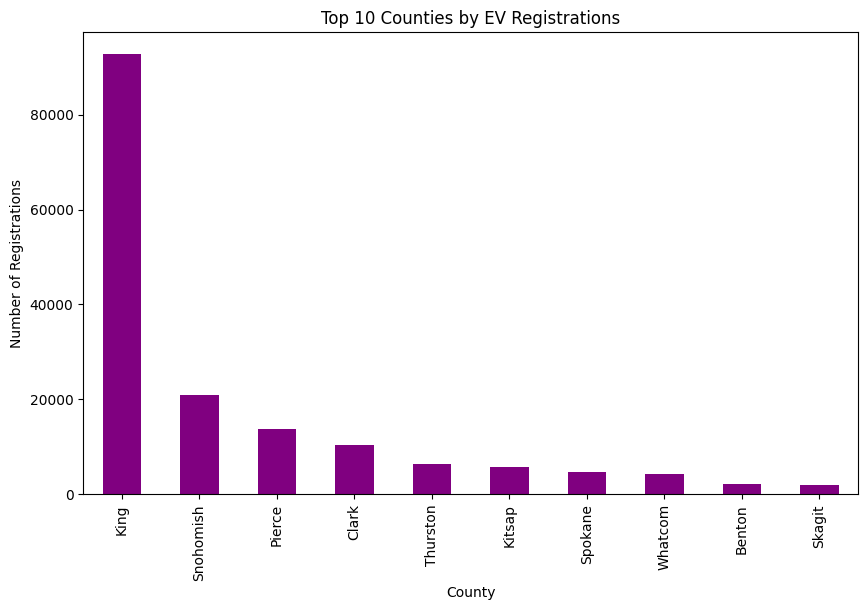

In [22]:
# Plot distributions
plt.figure(figsize=(10, 6))
make_distribution.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 EV Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Registrations')
plt.show()

plt.figure(figsize=(10, 6))
model_distribution.head(10).plot(kind='bar', color='green')
plt.title('Top 10 EV Models')
plt.xlabel('Model')
plt.ylabel('Number of Registrations')
plt.show()

plt.figure(figsize=(10, 6))
county_distribution.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Counties by EV Registrations')
plt.xlabel('County')
plt.ylabel('Number of Registrations')
plt.show()

In [23]:
# Estimate market size and growth potential
total_registrations = yearly_registrations.sum()
future_registrations = forecast.sum()
growth_rate = (future_registrations - total_registrations) / total_registrations * 100

print(f"Total historical registrations: {total_registrations}")
print(f"Forecasted registrations for next 5 years: {future_registrations}")
print(f"Estimated market growth rate: {growth_rate:.2f}%")

Total historical registrations: 177866
Forecasted registrations for next 5 years: 183669.48357270786
Estimated market growth rate: 3.26%


## Conclusion
This analysis provides a comprehensive overview of the electric vehicle market's historical trends, forecasted growth, and key distributions. The insights gained can help stakeholders make informed decisions regarding production, infrastructure planning, and policy formulation. By understanding the current market penetration and predicting future trends, stakeholders can better navigate the rapidly evolving EV market.

This portfolio project includes detailed discussions and visualizations to support the analysis, making it a valuable resource for anyone interested in the electric vehicle market.
